### Data prep

* [Tutorial source](https://www.datacamp.com/community/tutorials/wordcloud-python)
* `ip9`   - preferences for virtual/in person mental health care (byte)
* `ip9_1`  - reasons for the preference (string)
    * For ip9, it may make sense to group 1 and 2 (preference for in person) and 4 and 5 (preference for virtual)

In [57]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import date

import matplotlib.pyplot as plt
% matplotlib inline

In [80]:
drive_path = '/content/drive/MyDrive/'
font_path = os.path.join(drive_path, 
  'Documents/Roboto_Condensed/RobotoCondensed-Regular.ttf')
fig_path = os.path.join(drive_path, 'Colab Notebooks/figs/')

df = pd.read_csv(os.path.join(drive_path, 'Colab Notebooks/data/df_for_worldcloud.csv'))

In [3]:
df.head()

,ip9,ip9_1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1.0,"find it easier, understand questions easier"


In [4]:
# remove NA if present for all columns
df = df.dropna(how = 'all').reset_index(drop=True)
df.head()

,ip9,ip9_1
0,1.0,"find it easier, understand questions easier"
1,1.0,connection you have with a person face-to-face
2,4.0,"Convenience, ease of access, less disruption t..."
3,5.0,it's more convenient
4,NaN,"If a new issue, I'd want to see in person, but..."


In [5]:
df.isna().sum()

print("There are {} missing groups and {} missing free form responses. \n" \
      .format(df.ip9.isna().sum(), df.ip9_1.isna().sum()))

There are 2 missing groups and 15 missing free form responses. 



### Simple Wordcloud

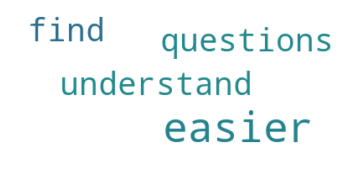

In [6]:
# Start with one response:
text = df['ip9_1'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="white") \
                      .generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
# save test
# Save the image in the img folder:
wordcloud.to_file(os.path.join(drive_path, "figs/first_response.png"))

### Wordcloud by group data


In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["thing"])

In [8]:
# creates preference groups, in person or virtual 
person = df.query('ip9 == 1 or ip9 == 2').dropna(subset = ['ip9_1']) \
  .reset_index(drop=True)
virtual = df.query('ip9 == 4 or ip9 == 5').reset_index(drop=True) \
  .dropna(subset = ['ip9_1']).reset_index(drop=True)

In [9]:
person_txt = " ".join(response for response in person['ip9_1'])
print("There are {} words in the combination of all in-person preferred responses."\
      .format(len(person_txt)))

There are 6703 words in the combination of all in-person preferred responses.


### Wordcloud custom function

Colour options under qualitative [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [92]:
def custom_cloud(x):
  """This function creates a custom 4k wordcloud based on the text data (x)."""
  wordcloud = WordCloud(stopwords=stopwords, font_path = font_path,
  background_color="white", width=3840, height=2160,
  max_words=500, colormap='Blues', random_state = 5).generate(x)
  # show fig
  fig = plt.figure(figsize=[16,9], dpi = 300)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

  return fig

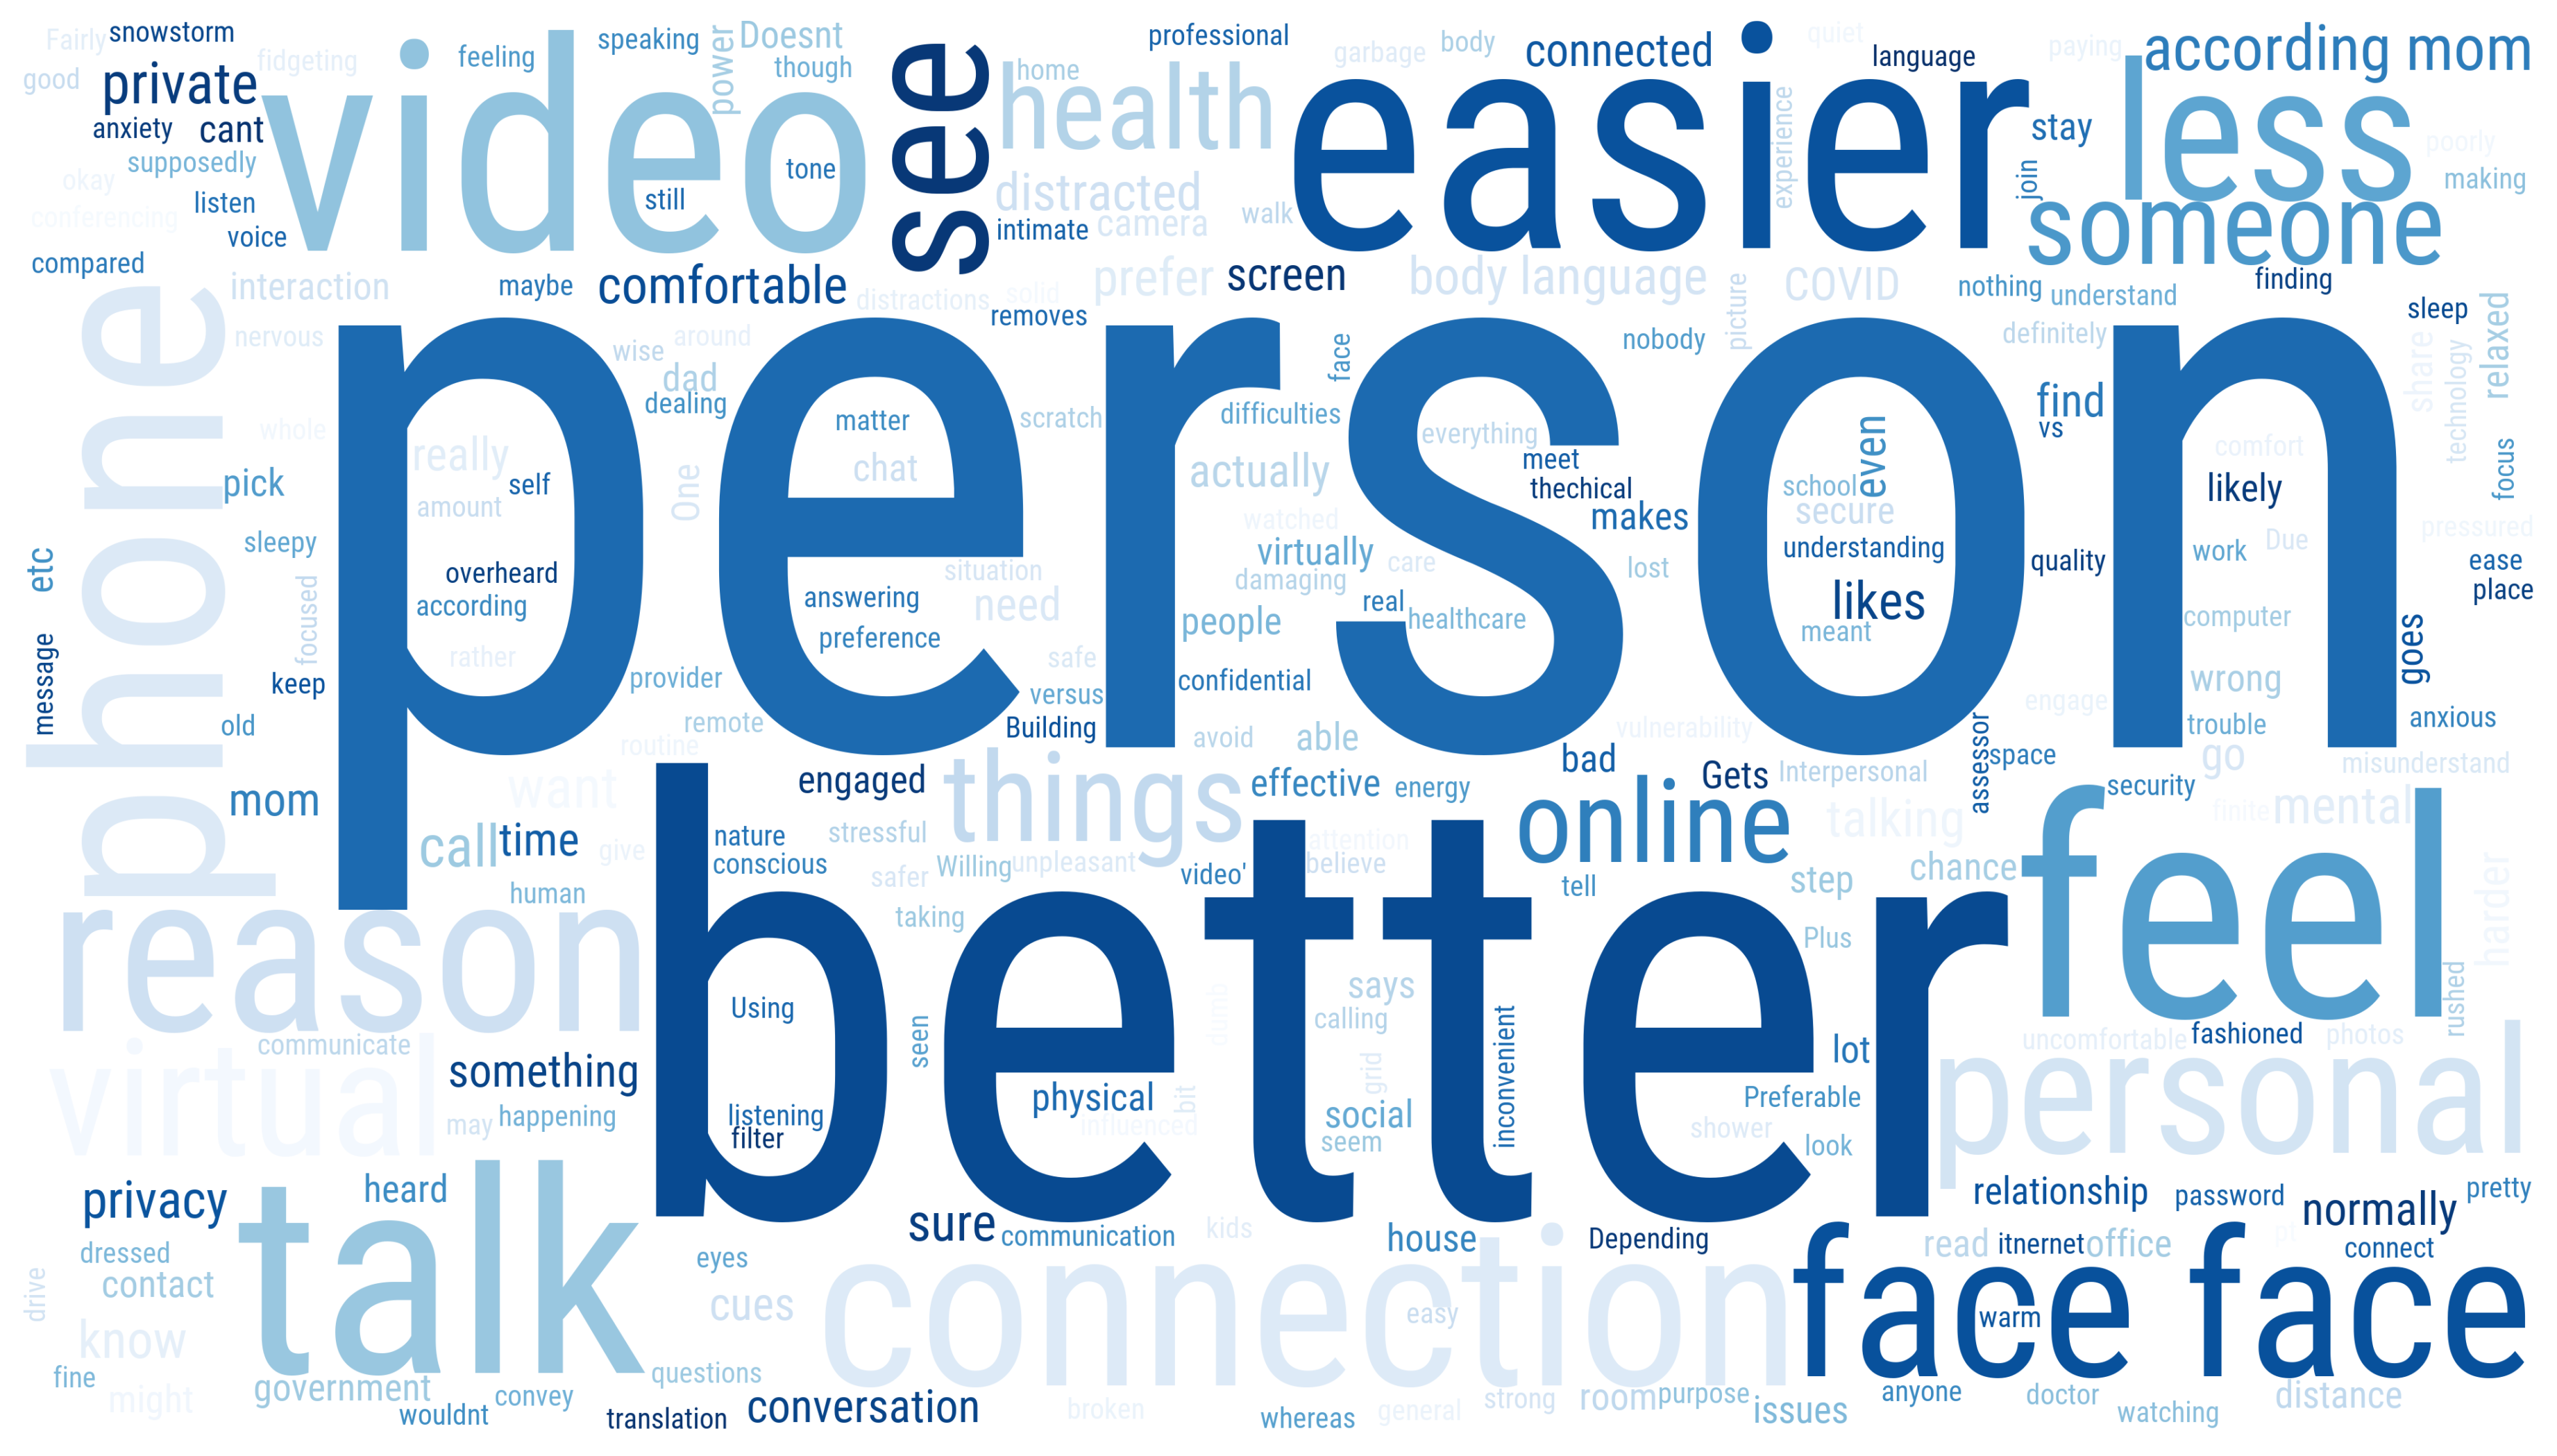

In [93]:
person_fig = custom_cloud(person_txt)

# saves fig with date of save
person_fig.savefig(os.path.join(
    fig_path, f'{date.today()}_person_wordcloud.png')
)

In [11]:
virtual_txt = " ".join(response for response in virtual['ip9_1'])
print("There are {} words in the combination of all virtual preferred responses."\
      .format(len(virtual_txt)))

There are 2241 words in the combination of all virtual preferred responses.


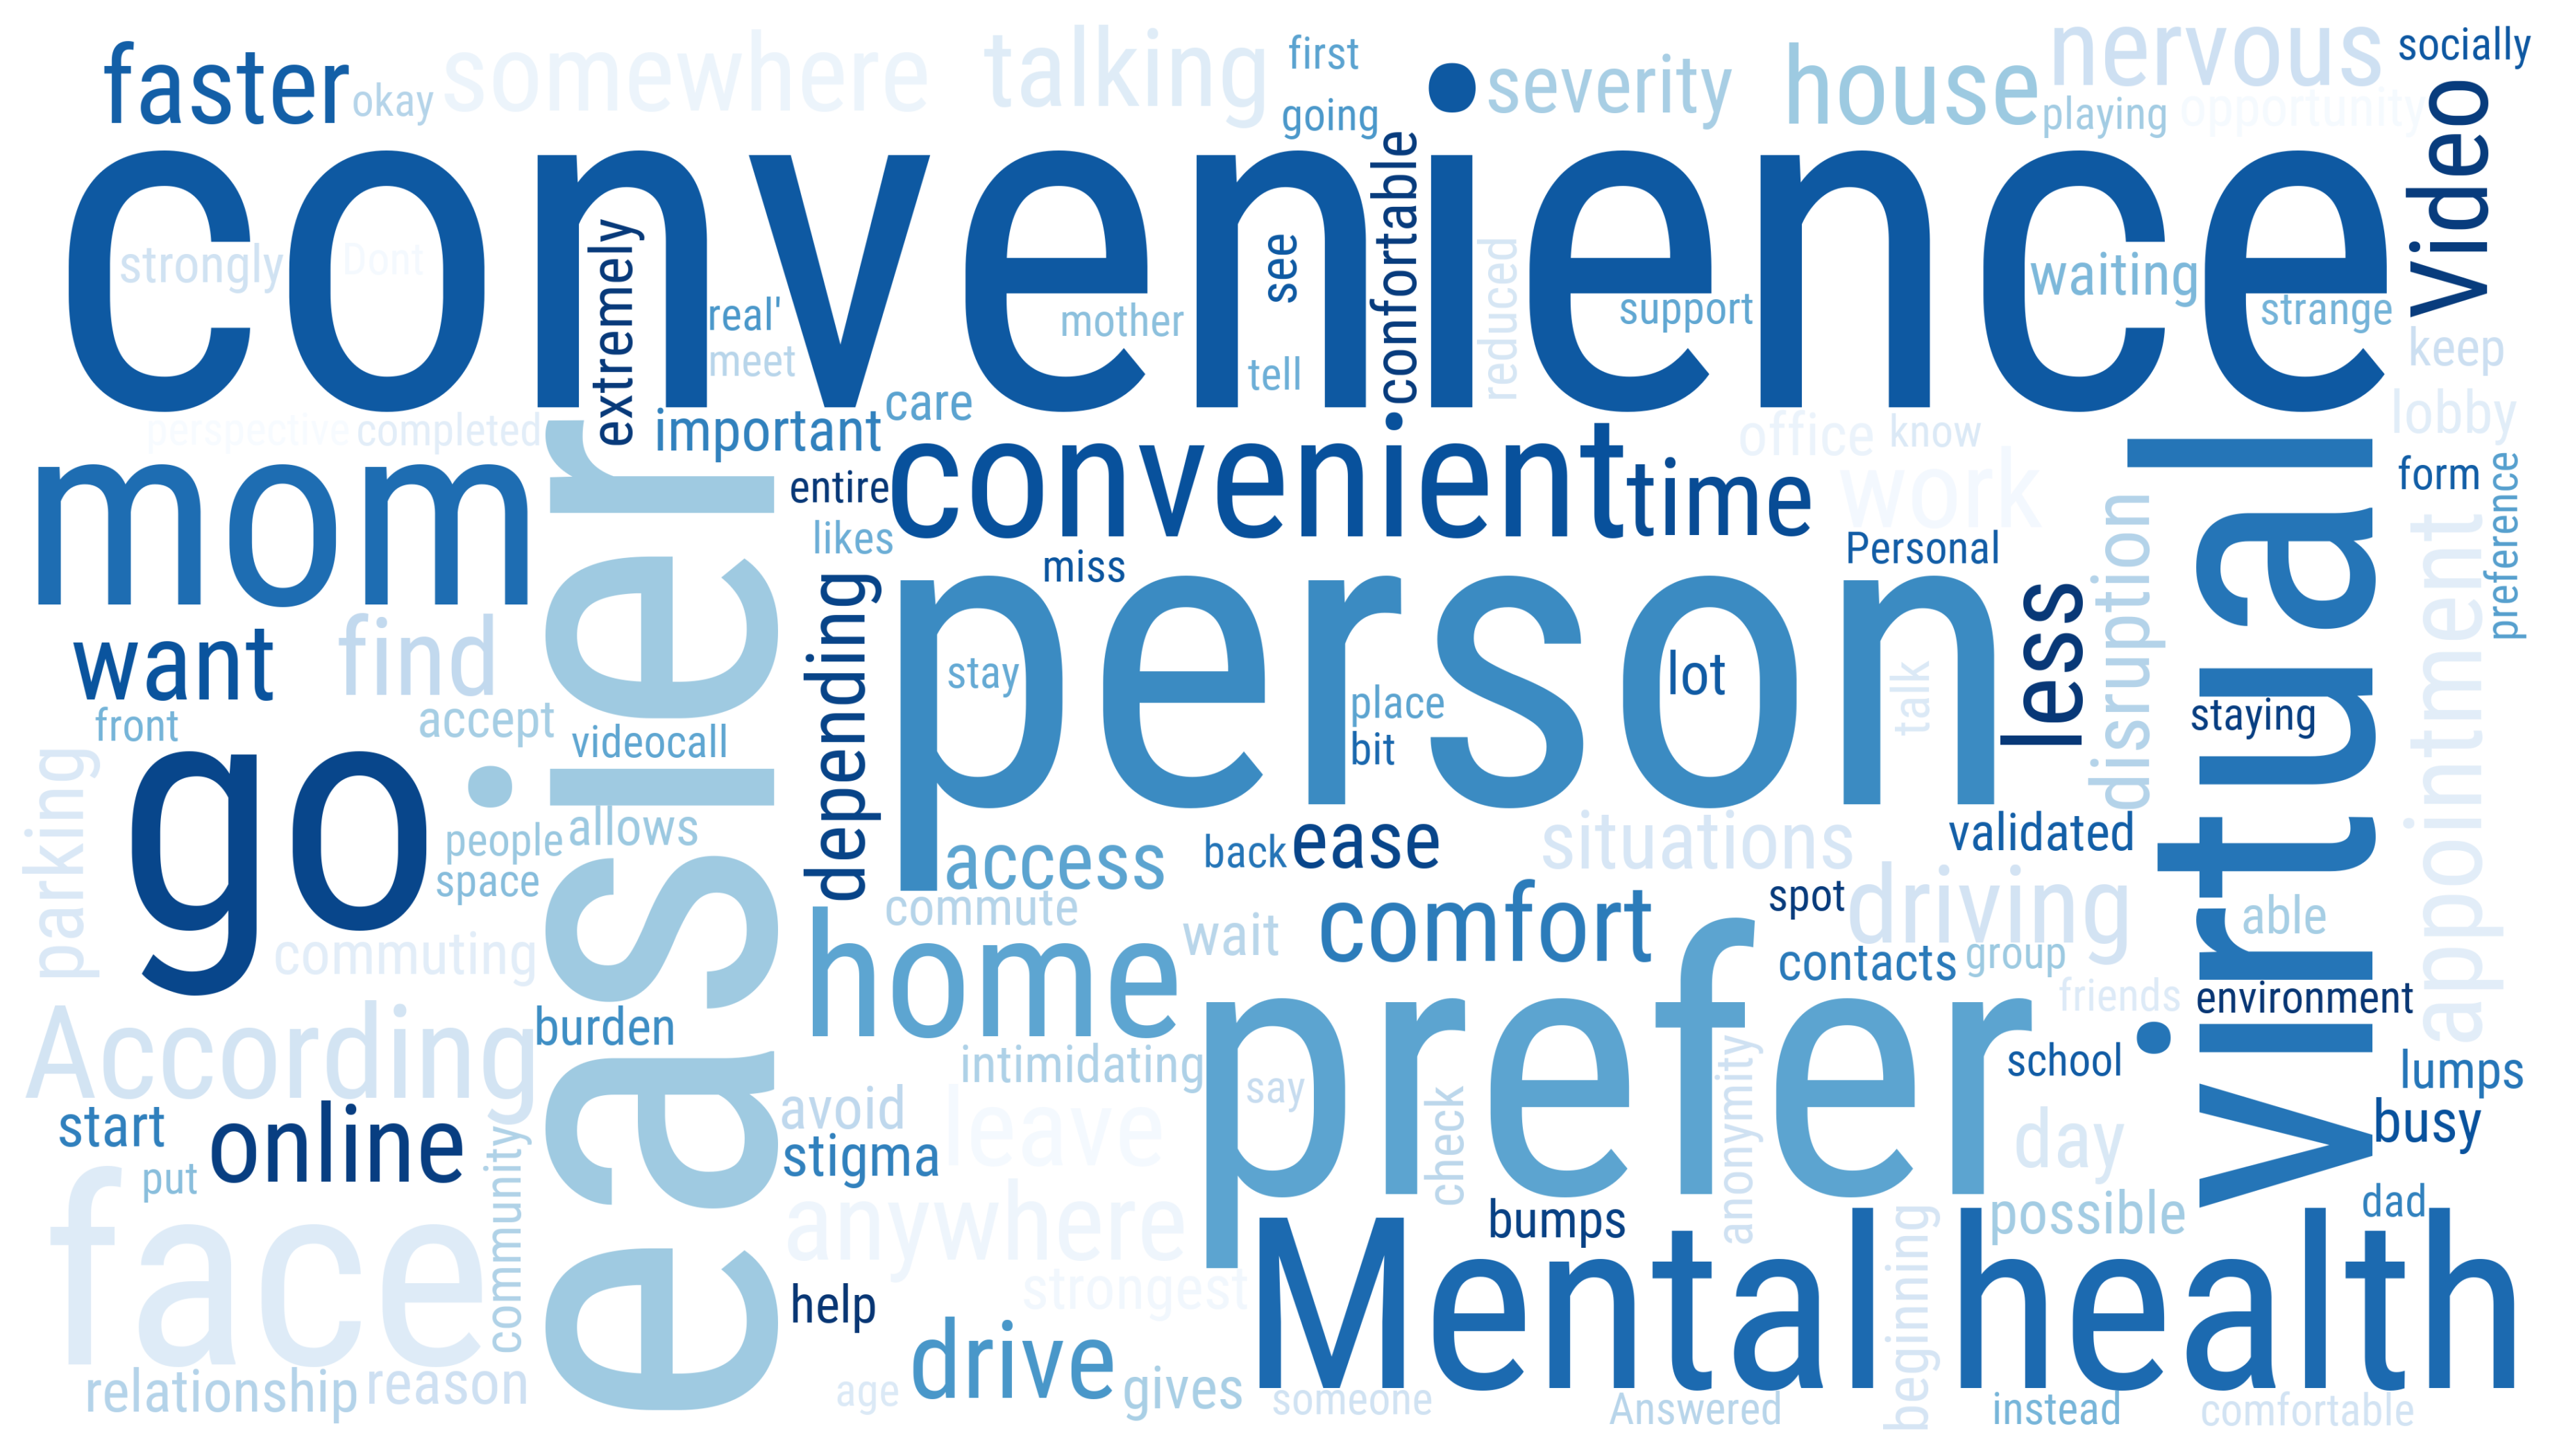

In [94]:
virtual_fig = custom_cloud(virtual_txt)

virtual_fig.savefig(os.path.join(
    fig_path, f'{date.today()}_virtual_wordcloud.png')
)